In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read the output file
df = pd.read_csv("hercules_output_control.csv", index_col=False)
df.head()

,dt,hercules_comms.amr_wind.wind_farm_0.num_turbines,hercules_comms.amr_wind.wind_farm_0.rotor_diameter,hercules_comms.amr_wind.wind_farm_0.turbine_powers.000,hercules_comms.amr_wind.wind_farm_0.turbine_powers.001,hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.000,hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.001,hercules_comms.amr_wind.wind_farm_0.wind_direction,hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind,hercules_comms.amr_wind.wind_farm_0.turbine_yaw_angles.000,...,py_sims.electrolyzer_stack_0.outputs.H2_output,py_sims.electrolyzer_stack_0.outputs.stacks_on,py_sims.inputs.available_power,py_sims.inputs.sim_time_s,controller.num_turbines,controller.initial_conditions.yaw,external_signals.time,external_signals.wind_power_reference,time,clock_time
0,0.5,2,126.0,0.000000,0.000000,0.0,0.0,0.0,0.0,-1000,...,0.000739,6,0.000000,0.0,2,270.0,0.5,4000.0,0.5,2024-04-02 14:35:46.039279
1,0.5,2,126.0,2843.004700,1314.059412,270.0,270.0,270.0,0.5,-1000,...,0.000671,6,4157.064112,0.5,2,270.0,1.0,4000.0,1.0,2024-04-02 14:35:46.168555
2,0.5,2,126.0,4264.507050,1971.089119,270.0,270.0,270.0,1.0,-1000,...,0.001112,6,6235.596168,1.0,2,270.0,1.5,4000.0,1.5,2024-04-02 14:35:46.220656
3,0.5,2,126.0,3132.253525,1985.544559,270.0,270.0,270.0,1.5,-1000,...,0.001586,6,5117.798084,1.5,2,270.0,2.0,4000.0,2.0,2024-04-02 14:35:46.274141
4,0.5,2,126.0,2948.363084,1610.535958,270.0,270.0,270.0,2.0,-1000,...,0.002015,6,4558.899042,2.0,2,270.0,2.5,4000.0,2.5,2024-04-02 14:35:46.328384


In [3]:
df.columns

Index(['dt', 'hercules_comms.amr_wind.wind_farm_0.num_turbines',
       'hercules_comms.amr_wind.wind_farm_0.rotor_diameter',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.001',
       'hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.001',
       'hercules_comms.amr_wind.wind_farm_0.wind_direction',
       'hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind',
       'hercules_comms.amr_wind.wind_farm_0.turbine_yaw_angles.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_yaw_angles.001',
       'hercules_comms.amr_wind.wind_farm_0.turbine_power_setpoints.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_power_setpoints.001',
       'hercules_comms.helics.config.use_dash_frontend',
       'hercules_comms.helics.config.KAFKA',
       'hercules_comms.helics.config.helics.helicsport',
       'hercules_comms.h

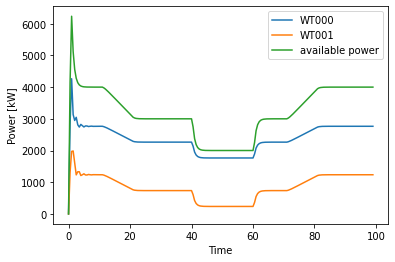

In [4]:
plt.figure()
time = df["hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind"]
plt.plot(time, df["hercules_comms.amr_wind.wind_farm_0.turbine_powers.000"], label="WT000")
plt.plot(time, df["hercules_comms.amr_wind.wind_farm_0.turbine_powers.001"], label="WT001")
plt.plot(time, df["py_sims.inputs.available_power"], label="available power")
plt.ylabel("Power [kW]")
plt.xlabel("Time")
plt.legend()

Number of stacks operating: 6


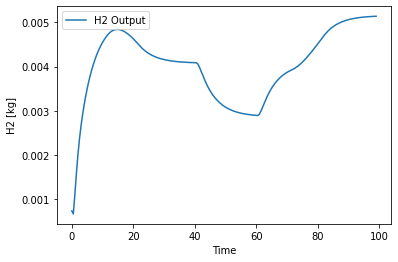

In [5]:
plt.figure()
plt.plot(time, df["py_sims.electrolyzer_stack_0.outputs.H2_output"], label="H2 Output")
# plt.plot(time, df["hercules_comms.amr_wind.wind_farm_0.turbine_powers.001"], label="WT001")
# plt.plot(time, df["py_sims.inputs.available_power"], label="available power")
plt.ylabel("H2 [kg]")
plt.xlabel("Time")
plt.legend()


print("Number of stacks operating:",df["py_sims.electrolyzer_stack_0.outputs.stacks_on"].iloc[-1])